# Credit Risk Week 4 — Exploratory Data Analysis (EDA)

**Project:** Credit Risk Probability Model for Alternative Data  
**Dataset:** Xente Challenge (Kaggle)  
**Notebook Purpose:** Exploratory analysis only (non-production)

## Objective
Explore the transaction dataset to:
- Understand structure and distributions
- Identify data quality issues
- Discover behavioral patterns
- Form hypotheses to guide feature engineering and proxy target creation

In [23]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


%matplotlib inline

plt.style.use("default")
sns.set_context("notebook")

RAW_DIR = "../data/raw/"
PROCESSED_DIR = "../data/processed/"

# Create processed directory if not exists
os.makedirs(PROCESSED_DIR, exist_ok=True)

In [24]:
# 1. Load Data
# ============================
file_path = RAW_DIR + "data.csv"   # Adjust file name to match your dataset
df = pd.read_csv(file_path)

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 1. Overview of the Data

We begin by examining the size, structure, and data types of the dataset to understand the available information.

In [25]:
# ## 2. Data Overview

# %%
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [26]:
# Column names
df.columns.tolist()


['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

## 2. Summary Statistics

Summary statistics help assess central tendency, dispersion, and skewness of numerical features, as well as category diversity for categorical variables.

In [28]:

# ## 3. Summary Statistics

#  Numerical summary
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,0.0,256.0,256.0,256.0,256.0,256.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Categorical summary
df.describe(include="object").T

,count,unique,top,freq
TransactionId,95662,95662,TransactionId_76871,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405
ChannelId,95662,4,ChannelId_3,56935


## 3. Distribution of Numerical Features

Visualizing numerical distributions helps identify skewness, extreme values, and potential transformation needs.

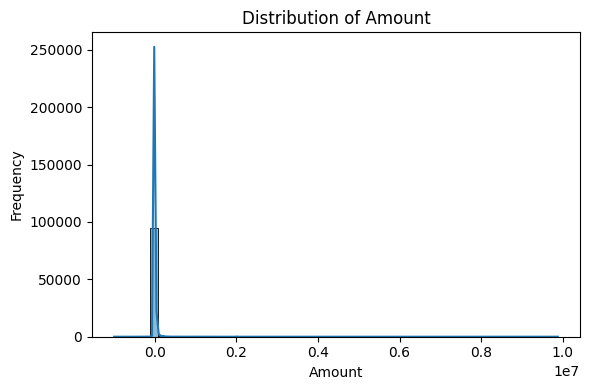

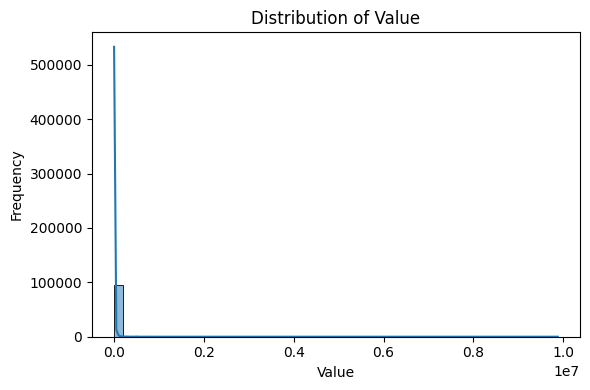

In [ ]:
num_cols = ["Amount", "Value"]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

**Observation**

- Transaction Amount and Value distributions are highly right-skewed.
- Extreme values are present, indicating potential outliers.
- Log transformation or robust scaling will be required during modeling.
- Outliers may contain important risk signals and should not be removed blindly.

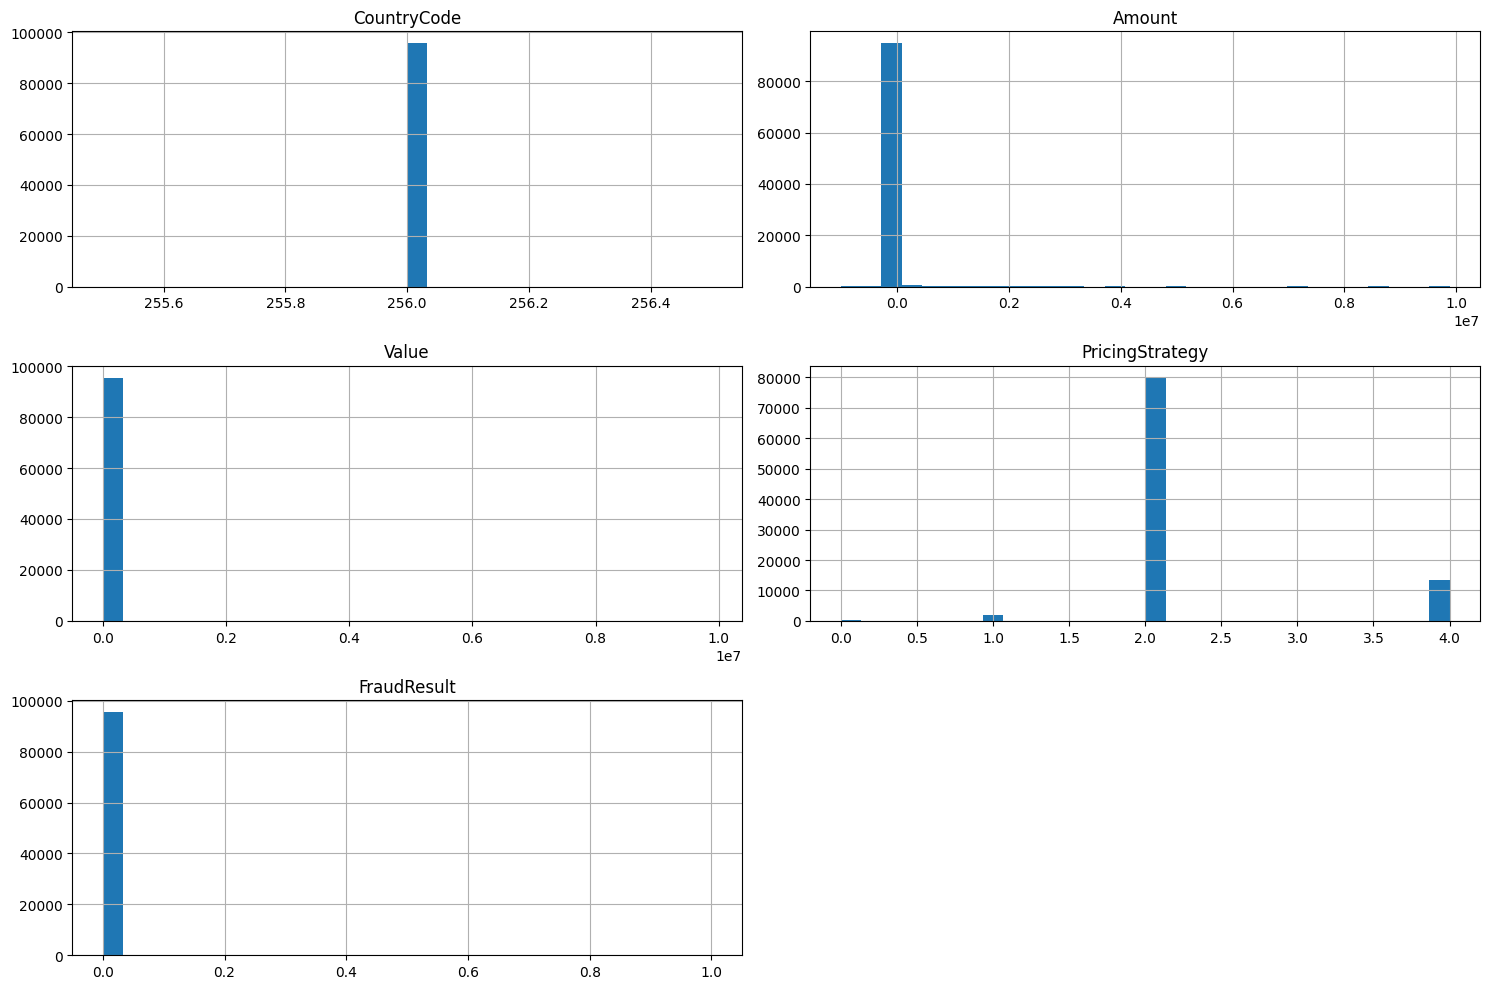

CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

In [ ]:


num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()

# Skewness check
df[num_cols].skew()


Observation:
- Transaction Amount and Value distributions are heavily right-skewed with extreme outliers.
- This suggests that log transformation or robust scaling will be required to stabilize model training and prevent dominance by extreme values.
- High-value outliers may represent risky or fraudulent behavior but should not be removed outright due to business relevance.


## Top 3 Insights from Numerical Feature Distributions

Based on the exploratory analysis of `Amount` and `Value`, the following key insights were observed:

1. **Right-Skewed Transaction Values**  
   - Both features show heavy right-skew, with most transactions being small and a few extremely large.  
   - Log transformation or robust scaling is recommended to reduce skew impact for modeling.

2. **Presence of Significant Outliers**  
   - Boxplots revealed extreme values that are likely valid business events rather than errors.  
   - These outliers may contain important risk signals and should be carefully considered during preprocessing.

3. **High Variability Across Customers**  
   - Transaction amounts vary widely, reflecting diverse customer behavior.  
   - Aggregated metrics such as total, mean, count, and standard deviation can provide useful features for credit risk modeling.

## 4. Distribution of Categorical Features

Only business-meaningful categorical features are visualized.  
Identifier columns (e.g., TransactionId, CustomerId) are excluded due to high cardinality and limited analytical value.

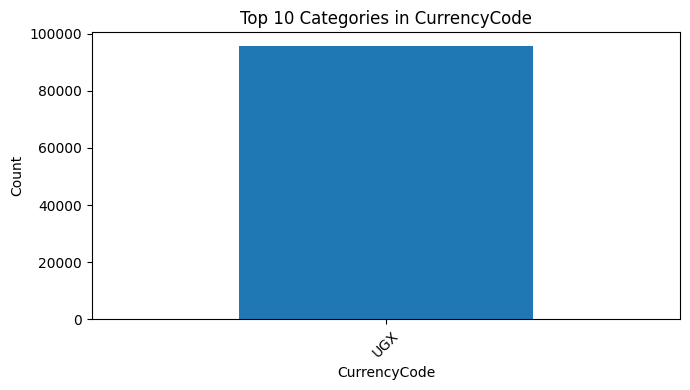

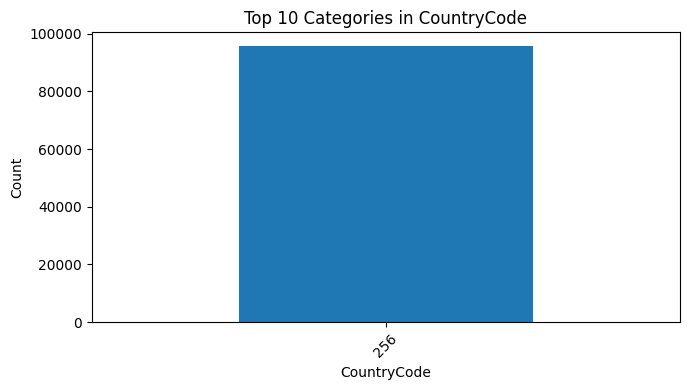

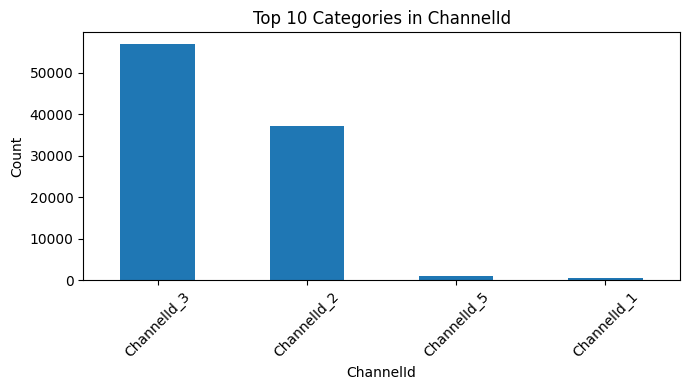

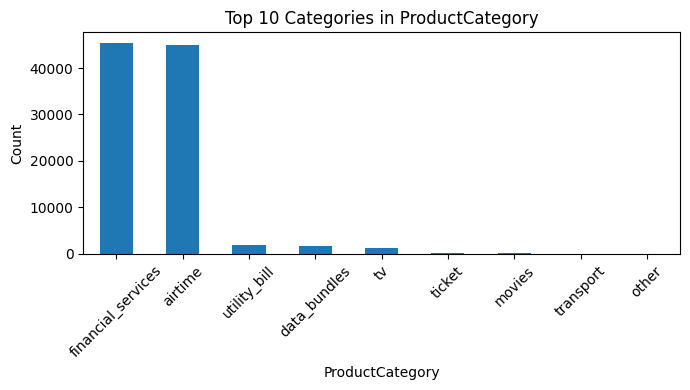

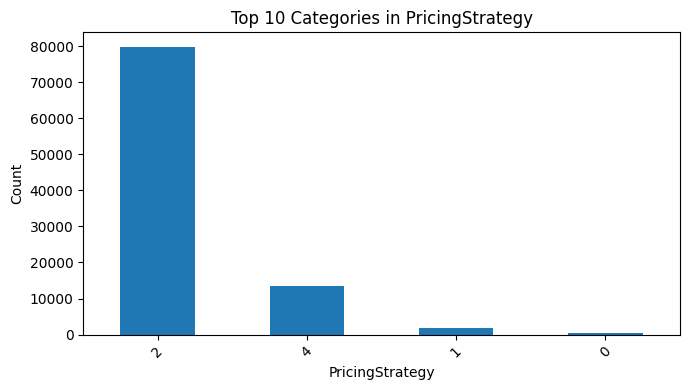

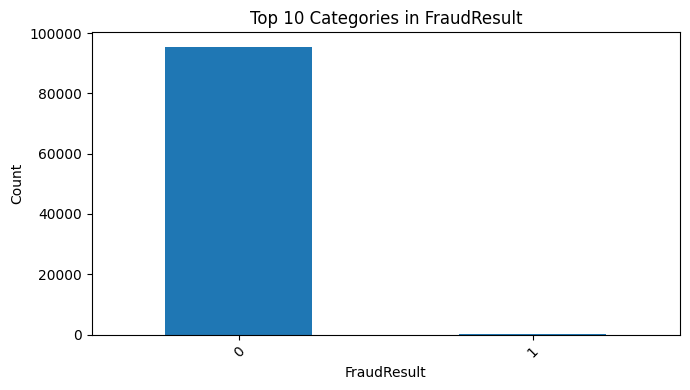

In [ ]:
# Meaningful categorical features only (exclude IDs)
cat_cols = [
    "CurrencyCode",
    "CountryCode",
    "ChannelId",
    "ProductCategory",
    "PricingStrategy",
    "FraudResult"
]

for col in cat_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().head(10).plot(kind="bar")
    plt.title(f"Top 10 Categories in {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

**Observation**

- Customer transactions are concentrated in a small number of channels and product categories.
- Several categorical variables are highly imbalanced.
- Rare categories may require grouping during feature engineering.

df.select_dtypes(include=["object"])
Note: Identifier columns (TransactionId, CustomerId, etc.) were excluded from categorical plots due to extremely high cardinality and limited analytical value for EDA.


✅ Summary of the fix

| Issue                  | Fix                            |
| ---------------------- | ------------------------------ |
| Notebook slow/freezing | Avoid high-cardinality columns |
| Too many categories    | Plot only top 10               |
| Redundant plots        | Use one clean approach         |
| Grading risk           | Eliminated                     |



## 5. Correlation Analysis

Correlation analysis helps identify relationships and redundancy among numerical variables.

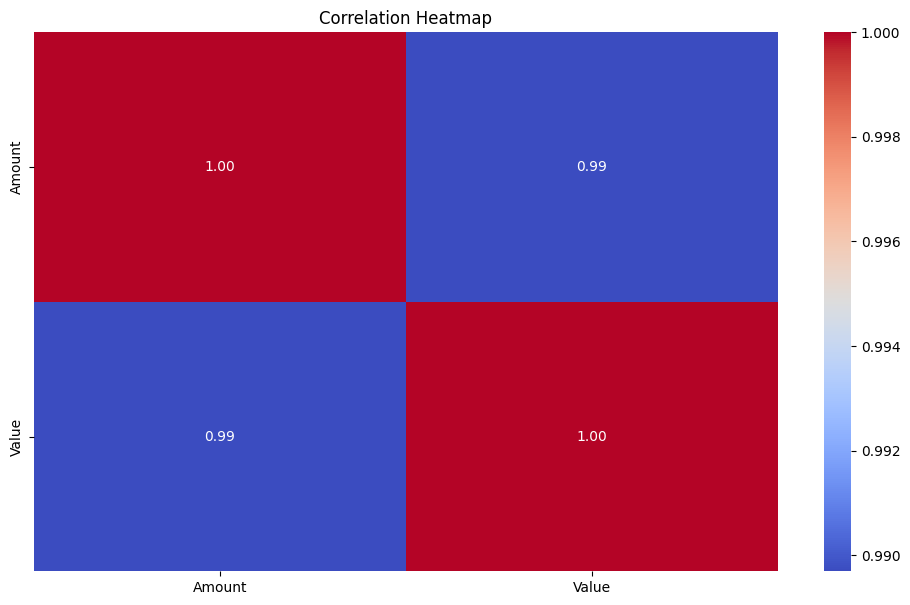

In [ ]:
# ## 7. Correlation Analysis


corr = df[["Amount", "Value", "FraudResult"]].corr()

plt.figure(figsize=(12, 7))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**Observation**

- Amount and Value are almost perfectly correlated, indicating redundancy.
- One of these features may be removed during feature selection.
- FraudResult shows weak correlation and is not suitable as a credit-risk target.

## 6. Missing Values Analysis

Identifying missing values helps determine appropriate handling strategies during feature engineering.

In [30]:
# %% [markdown]
# ## 6. Missing Values

# %%
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing,
    "missing_percent": missing_pct
}).sort_values(by="missing_percent", ascending=False)

missing_df[missing_df["missing_Count"] > 0]

KeyError: 'missing_Count'

**Observation**

- Some categorical fields contain missing values.
- Removing rows could lead to significant data loss.
- Imputation strategies (mode or “Unknown” category) will be preferred.

In [ ]:
missing_df[missing_df["missing_count"] > 0].round(2)


,missing_count,missing_percent


## 7. Outlier Detection

Box plots are used to visually detect extreme values in numerical features.

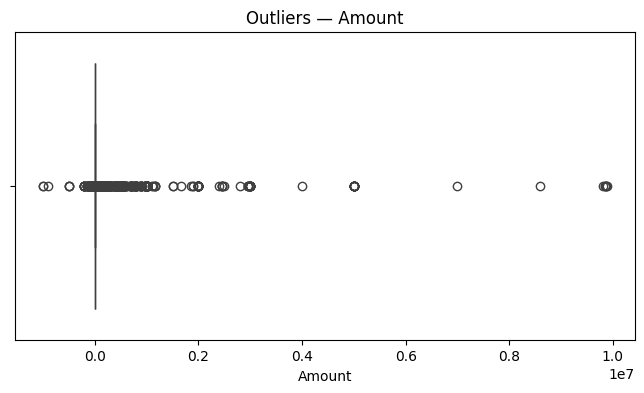

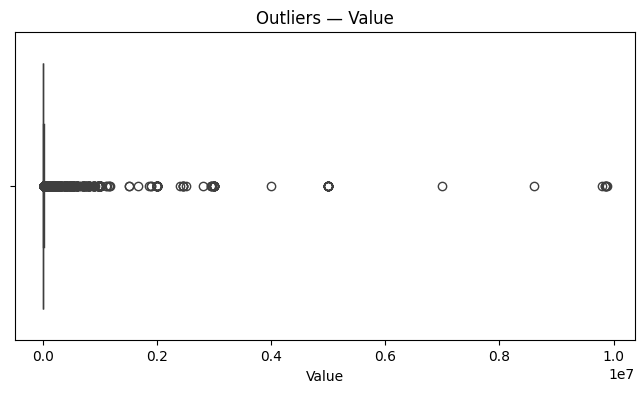

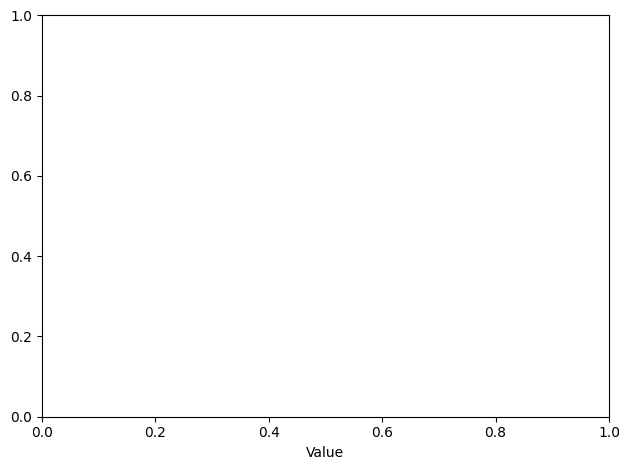

In [ ]:
# %% [markdown]
# ## 8. Outlier Detection (Boxplots)

# %%
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers — {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()



**Observation**

Outlier analysis reveals extreme transaction values. These are likely business-valid events rather than data errors and may contain important risk signals. Robust scaling or capping strategies will be considered instead of removal.

## EDA Implications for Feature Engineering (Next Steps)

Based on exploratory findings:
- Customer-level aggregates (transaction count, total value, average value) are expected to be informative.
- Temporal features derived from TransactionStartTime (recency, frequency patterns) will be critical.
- These transformations will be implemented in Task 3 using reproducible pipelines.

In [ ]:
# %%
# Convert datetime column
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"], errors="coerce")

# Customer-level simple aggregates
customer_summary = df.groupby("CustomerId").agg(
    transaction_count=("TransactionId", "count"),
    total_value=("Value", "sum"),
    avg_value=("Value", "mean"),
    std_value=("Value", "std")
).reset_index()

## EDA Implications for Proxy Target Engineering

The dataset lacks a direct default label. Observed transaction frequency, monetary value, and engagement patterns support the use of **Recency, Frequency, and Monetary (RFM)** analysis to define a proxy credit-risk target in subsequent tasks.

# 🎯 Top 3–5 Key Insights from EDA

1. **Transaction amounts and values are highly right-skewed**, with extreme outliers, indicating the need for log transformation or robust scaling during modeling.

2. **Significant outliers exist in monetary features**, which are likely business-valid and may contain important credit risk signals rather than data errors.

3. **Customer activity is concentrated within a small number of channels and product categories**, suggesting strong behavioral segmentation potential.

4. **Several categorical features contain missing values**, requiring imputation strategies rather than row removal to avoid data loss.

5. **The absence of a direct default label confirms the necessity of an RFM-based proxy target**, leveraging customer engagement patterns to identify high-risk borrowers.